In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import truncnorm

In [ ]:
df = pd.read_csv('exams.csv')
df = df.drop(columns=['gender', 'parental level of education', 'lunch', 'test preparation course', 'race/ethnicity'])
df['english score'] = (df['reading score'] + df['writing score'])/2
df['score difference'] = df['math score'] - df['english score']
df

,math score,reading score,writing score,english score,score difference
0,59,70,78,74.0,-15.0
1,96,93,87,90.0,6.0
2,57,76,77,76.5,-19.5
3,70,70,63,66.5,3.5
4,83,85,86,85.5,-2.5
...,...,...,...,...,...
995,77,77,71,74.0,3.0
996,80,66,66,66.0,14.0
997,67,86,86,86.0,-19.0
998,80,72,62,67.0,13.0


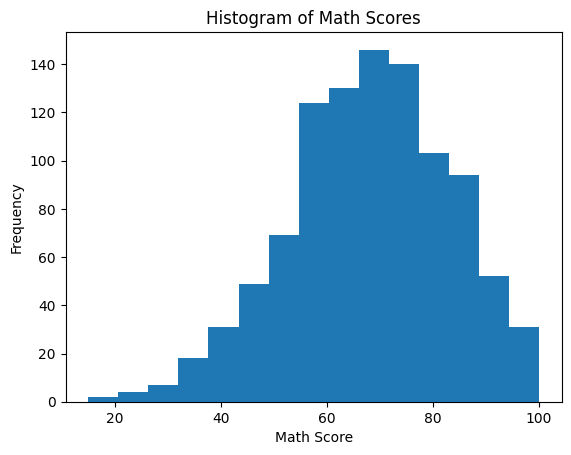

In [ ]:
df['math score'].plot.hist(bins=15)
plt.xlabel('Math Score')
plt.ylabel('Frequency')
plt.title('Histogram of Math Scores')
plt.show()

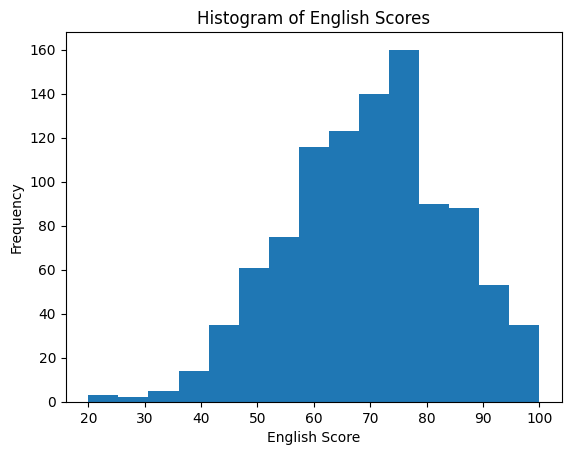

In [ ]:
df['english score'].plot.hist(bins=15)
plt.xlabel('English Score')
plt.ylabel('Frequency')
plt.title('Histogram of English Scores')
plt.show()

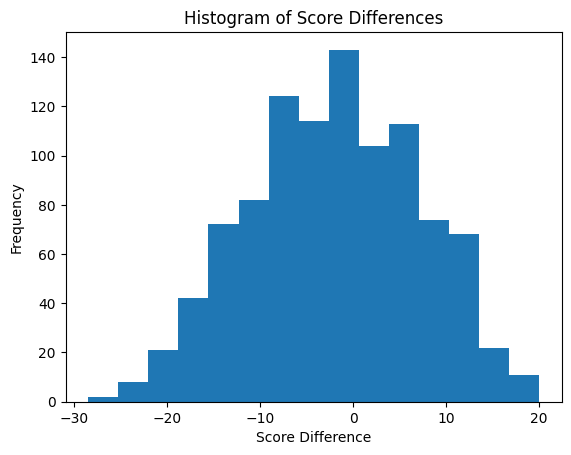

In [ ]:
df['score difference'].plot.hist(bins=15)
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.title('Histogram of Score Differences')
plt.show()

In [ ]:
math_score_mean = df['math score'].mean()
english_score_mean = df['english score'].mean()
score_difference_mean = df['score difference'].mean()
math_score_std = df['math score'].std()
english_score_std = df['english score'].std()
score_difference_std = df['score difference'].std()
print(math_score_mean)
print(english_score_mean)
print(score_difference_mean)
print(math_score_std)
print(english_score_std)
print(score_difference_std)

67.81
69.761
-1.951
15.250195686235259
14.379591498079897
9.14643407324714


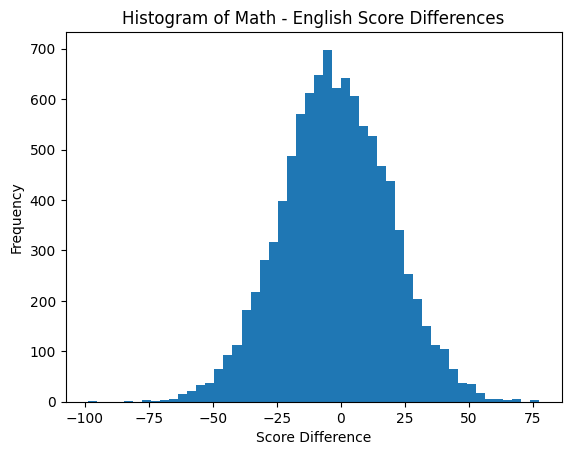

Mean of the score differences: -2.18
Standard deviation of the score differences: 21.10


In [ ]:
import numpy as np
num_simulations = 10000
np.random.seed(42)
math_score_distribution = np.random.normal(math_score_mean, math_score_std, num_simulations)
english_score_distribution = np.random.normal(english_score_mean, english_score_std, num_simulations)

score_difference_distribution = math_score_distribution - english_score_distribution

plt.hist(score_difference_distribution, bins=50)
plt.title('Histogram of Math - English Score Differences')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.show()

simulation_mean = np.mean(score_difference_distribution)
simulation_std = np.std(score_difference_distribution)

print(f'Mean of the score differences: {simulation_mean:.2f}')
print(f'Standard deviation of the score differences: {simulation_std:.2f}')


In [ ]:
lower_bound = 0
upper_bound = 100
def get_truncated_normal(mean, std, lower, upper, size):
    a, b = (lower - mean) / std, (upper - mean) / std
    return truncnorm.rvs(a, b, loc=mean, scale=std, size=size)

[80.1871118  77.72214015 41.0568169  ... 79.26757671 67.15705589
 39.82629378]


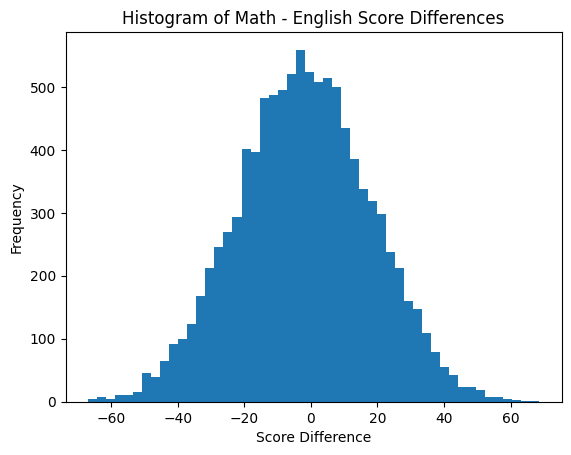

Mean of the score differences: -1.99
Standard deviation of the score differences: 19.91


In [ ]:
math_score_distribution = get_truncated_normal(math_score_mean, math_score_std, lower_bound, upper_bound, num_simulations)
english_score_distribution = get_truncated_normal(english_score_mean, english_score_std, lower_bound, upper_bound, num_simulations)
score_difference_distribution = math_score_distribution - english_score_distribution
print(math_score_distribution)

plt.hist(score_difference_distribution, bins=50)
plt.title('Histogram of Math - English Score Differences')
plt.xlabel('Score Difference')
plt.ylabel('Frequency')
plt.show()

simulation_mean = np.mean(score_difference_distribution)
simulation_std = np.std(score_difference_distribution)

print(f'Mean of the score differences: {simulation_mean:.2f}')
print(f'Standard deviation of the score differences: {simulation_std:.2f}')

In [ ]:
percentile = (np.sum(score_difference_distribution < score_difference_mean))/num_simulations
percentile

0.4969